In [1]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.cms.style.ROOT)
import ROOT
import PlotTools
from ROOT import TLine, TFile, TCanvas, kRed, THStack, kYellow, kGreen, kBlack, TLegend, TGraphAsymmErrors

Welcome to JupyROOT 6.18/00


In [2]:
file = ROOT.TFile.Open('../data/shapes_Zprime_m500_gb1_dbs0.root','read')
file.cd()

True

In [6]:
mjjsr = file.Get('all/backg')
#mjjsr_dcr = file.Get('mjjsr_dcr')
mjjsr_up = file.Get('all/backg_SystUp')
mjjsr_down = file.Get('all/backg_SystDown')

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'


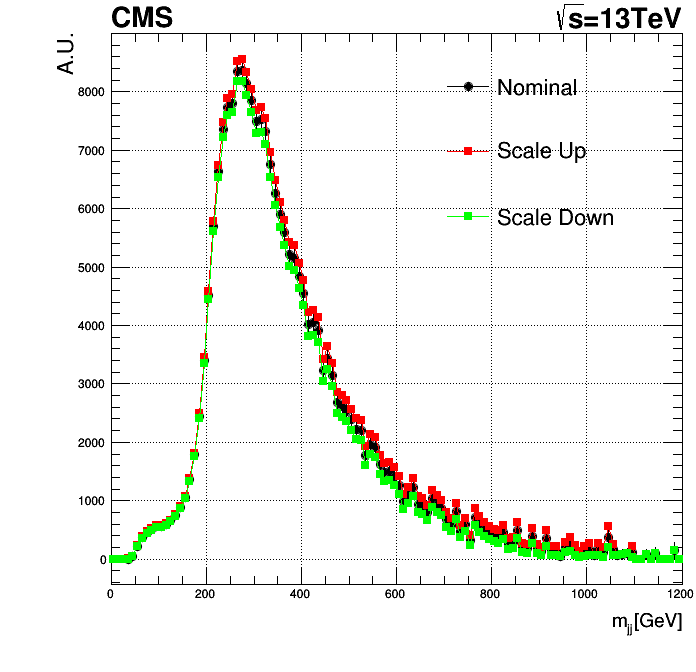

In [10]:
from rootpy.plotting.style import get_style
from rootpy.plotting.style.cmstdr.labels import CMS_label

style = get_style('CMSTDR')

with style:
    c1 = ROOT.TCanvas("","",700,700)
    mjjsr.SetStats(0)
    mjjsr.SetTitle("")
    mjjsr.GetYaxis().SetTitle('A.U.')
    mjjsr.GetXaxis().SetTitle('m_{jj}[GeV]')
    mjjsr.GetYaxis().SetLabelSize(0.02)
    mjjsr.GetYaxis().SetTitleOffset(1.2)
    mjjsr.GetXaxis().SetLabelSize(0.02)
    mjjsr.GetXaxis().SetTitleOffset(1.2)
    mjjsr.GetXaxis().SetTitleSize(0.03)
    mjjsr.SetMarkerStyle(20)
    mjjsr.SetLineColor(kBlack)
    mjjsr.SetMarkerColor(kBlack)
    mjjsr_up.SetLineColor(kRed)
    mjjsr_up.SetMarkerColor(kRed)
    mjjsr_up.SetMarkerStyle(21)
    #mjjsr.Rebin(2)
    #mjjsr_dcr_up.Rebin(2)
    #mjjsr_dcr_down.Rebin(2)
    mjjsr.Draw()
    mjjsr_down.SetMarkerStyle(21)
    mjjsr_down.SetLineColor(kGreen)
    mjjsr_down.SetMarkerColor(kGreen)
    mjjsr_up.Draw('APL same')
    mjjsr_down.Draw('APL same')
    ROOT.gPad.Update()
    #graph.Draw()
    
    leg = TLegend(.63,.63,.97,.92)
    leg.SetBorderSize(0)
    leg.SetFillColor(0)
    leg.SetFillStyle(0)
    leg.SetTextFont(42)
    leg.SetTextSize(0.035)
    leg.AddEntry(mjjsr,"Nominal","APL")
    leg.AddEntry(mjjsr_up,"Scale Up","APL")
    leg.AddEntry(mjjsr_down,"Scale Down","APL")
    leg.Draw("same")
    c1.SetGridx()
    c1.SetGridy()
    c1.Draw()
    CMS_label("", sqrts=13)

In [11]:
c1.SaveAs('../plots/backg_SR.png')

INFO:ROOT.TCanvas.Print] png file ../plots/backg_SR.png has been created
